**What score did you receive?**

24%

**Did any of the answers surprise you?**

I am kind of superised that the world is not as bad as I thought. Such as majority of the world population live middle income countries, and the life expectancy of the world population is 70 years. 


Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a
figure and any relevant output with your answer.

In [ ]:
Original question : Where does the majority of the world population live?

In [240]:
country_data

,country,income_groups
1,abw,high_income
2,afg,low_income
3,ago,upper_middle_income
7,alb,upper_middle_income
8,and,high_income
...,...,...
265,wsm,lower_middle_income
266,yem,lower_middle_income
270,zaf,upper_middle_income
271,zmb,lower_middle_income


In [278]:
country_data = pd.read_csv("data/ddf--entities--geo--country.csv")[["country", "income_groups"]]
population_data = pd.read_csv("data/ddf--datapoints--total_population_with_projections--by--geo--time.csv")
population_data.dropna(inplace = True)
country_data.dropna(inplace = True)
income_dataset = pd.merge(country_data, population_data, left_on = "country", right_on = "geo")

In [281]:
plot_data.reset_index()

,income_groups,time,total_population_with_projections
0,high_income,144720,1260191060
1,low_income,72360,802669800
2,lower_middle_income,94470,2450094050
3,upper_middle_income,110550,2356705437


([<matplotlib.axis.XTick at 0x145ca4f98>,
 <a list of 4 Text xticklabel objects>)

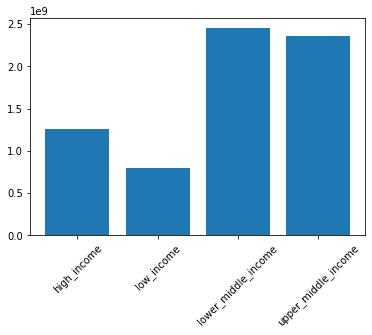

In [292]:
%matplotlib inline
plot_data = income_dataset[income_dataset["time"] == 2010].groupby("income_groups").sum()
plot_data = plot_data.reset_index()
plt.bar(plot_data["income_groups"], plot_data["total_population_with_projections"])
plt.xticks(np.arange(4), plot_data["income_groups"], fontsize=10, rotation=45)

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools
%matplotlib notebook

Using matplotlib backend: nbAgg


Traceback (most recent call last):
  File "/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [369]:
gdp = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
country = pd.read_csv("data/ddf--entities--geo--country.csv")[["country", "gapminder_list", "world_4region"]]
population = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")
gdp.dropna(inplace = True)
country.dropna(inplace = True)
population.dropna(inplace = True)                         

data = pd.merge(gdp, country, left_on = "geo", right_on = "country" )[["time", "gdppercapita_us_inflation_adjusted", "gapminder_list", "geo", "world_4region"]]
data = pd.merge(data, population, on = ["geo", "time"])

data = data.rename(columns = {"gapminder_list":"country", "gdppercapita_us_inflation_adjusted":"gdppercapita"})


In [351]:
dataset1960 = data[data["time"] == 1960]
dataset1960["geo"] = dataset1960["geo"].str.upper()

dataset1970 = data[data["time"] == 1970]
dataset1970["geo"] = dataset1970["geo"].str.upper()

dataset1980 = data[data["time"] == 1980]
dataset1980["geo"] = dataset1980["geo"].str.upper()

dataset1990 = data[data["time"] == 1990]
dataset1990["geo"] = dataset1990["geo"].str.upper()


dataset2000 = data[data["time"] == 2000]
dataset2000["geo"] = dataset2000["geo"].str.upper()

dataset2010 = data[data["time"] == 2010]
dataset2010["geo"] = dataset2010["geo"].str.upper()

/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/yutian/Documents/NEU/ds5500/ds5500/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [352]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = dataset1960['geo'],
    z = dataset1990["gdppercapita"],
    text = dataset1960['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [353]:

fig = go.Figure(data=go.Choropleth(
    locations = dataset1970['geo'],
    z = dataset1970["gdppercapita"],
    text = dataset1970['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [354]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset1980['geo'],
    z = dataset1980["gdppercapita"],
    text = dataset1980['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [355]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset1970['geo'],
    z = dataset1990["gdppercapita"],
    text = dataset1990['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [356]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset2000['geo'],
    z = dataset2000["gdppercapita"],
    text = dataset1960['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

In [357]:
fig = go.Figure(data=go.Choropleth(
    locations = dataset1970['geo'],
    z = dataset2010["gdppercapita"],
    text = dataset2010['geo'],
    colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP/capita US$',
))
fig.show()

by continent

In [370]:
data["total_gdp"] = data["population_total"] * data["gdppercapita"]

In [384]:
continent_gdp_data = data.groupby(["time", "world_4region"]).sum().reset_index()
continent_gdp_data["continent_avg_gdp"] = continent_gdp_data["total_gdp"] / continent_gdp_data["population_total"]
continent_gdp_data = continent_gdp_data.pivot(index = "time", columns = "world_4region", values = "continent_avg_gdp")

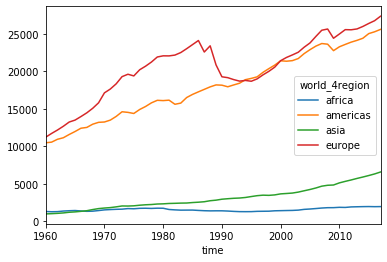

In [385]:
continent_gdp_data.plot()


In [368]:
data

,time_x,gdppercapita,country,geo,world_4region,time_y,population_total,total_gdp
0,2002,364.57057,Afghanistan,afg,asia,1800,3280000,1.195791e+09
1,2002,364.57057,Afghanistan,afg,asia,1801,3280000,1.195791e+09
2,2002,364.57057,Afghanistan,afg,asia,1802,3280000,1.195791e+09
3,2002,364.57057,Afghanistan,afg,asia,1803,3280000,1.195791e+09
4,2002,364.57057,Afghanistan,afg,asia,1804,3280000,1.195791e+09
...,...,...,...,...,...,...,...,...
2586488,2017,927.39866,Zimbabwe,zwe,africa,2096,40469281,3.753116e+10
2586489,2017,927.39866,Zimbabwe,zwe,africa,2097,40533896,3.759108e+10
2586490,2017,927.39866,Zimbabwe,zwe,africa,2098,40591626,3.764462e+10
2586491,2017,927.39866,Zimbabwe,zwe,africa,2099,40642628,3.769192e+10


In [95]:
# read data
gdpdata = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
country = pd.read_csv("data/ddf--entities--geo--country.csv")[["country", "gapminder_list", "world_6region"]]
lifedata = pd.read_csv("data/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
childdata = pd.read_csv("data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")
population = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")

# drop rows with null value
gdpdata.dropna(inplace = True)
country.dropna(inplace = True)
lifedata.dropna(inplace = True)
childdata.dropna(inplace = True)
population.dropna(inplace = True)

# merge multiple dataset as one dataset
#
gdpdata = pd.merge(gdpdata, country, left_on = "geo", right_on = "country" )[["time", "gdppercapita_us_inflation_adjusted", "gapminder_list", "geo", "world_6region"]]
data_frames = [gdpdata, lifedata, childdata, population]
dataset = functools.reduce(lambda  left,right: pd.merge(left,right,on=['time', "geo"],how='inner'), data_frames)
dataset = dataset.rename(columns = {"gapminder_list":"country", "gdppercapita_us_inflation_adjusted":"gdppercapita", "world_6region":"continent", "life_expectancy_years":"life_expectancy","child_mortality_0_5_year_olds_dying_per_1000_born":"child_mortality"})
dataset["gdp_total"] = dataset["population_total"] * dataset["gdppercapita"]
dataset["life_total"] = dataset["population_total"] * dataset["life_expectancy"]
dataset["child_mortality_total"] = dataset["population_total"] * dataset["life_expectancy"]

In [98]:
dataset = dataset.groupby(['time','continent']).sum()
dataset["avg_gdp"] = dataset["gdp_total"] / dataset["population_total"]
dataset["avg_child_mortality"] = dataset["child_mortality_total"] / dataset["population_total"]
dataset["avg_live"] = dataset["life_total"] / dataset["population_total"]
dataset.reset_index(inplace=True)  

In [99]:
dataset

,time,continent,gdppercapita,life_expectancy,child_mortality,population_total,gdp_total,life_total,child_mortality_total,avg_gdp,avg_child_mortality,avg_live
0,1960,america,1.164310e+05,1413.74,3111.689,406299025,4.261708e+12,2.589970e+10,2.589970e+10,10489.093073,63.745421,63.745421
1,1960,east_asia_pacific,3.926360e+04,657.54,1628.460,961633476,1.282814e+12,3.751969e+10,3.751969e+10,1333.994900,39.016624,39.016624
2,1960,europe_central_asia,2.037692e+05,1032.34,798.100,271250358,3.047523e+12,1.843882e+10,1.843882e+10,11235.093793,67.977132,67.977132
3,1960,middle_east_north_africa,1.482680e+04,215.55,925.002,62118213,1.280524e+11,3.069089e+09,3.069089e+09,2061.431446,49.407234,49.407234
4,1960,south_asia,1.246610e+03,178.27,1091.300,552651659,1.709805e+11,2.341729e+10,2.341729e+10,309.382011,42.372606,42.372606
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2017,east_asia_pacific,3.614866e+05,1894.42,583.422,2286931661,2.251645e+13,1.741210e+11,1.741210e+11,9845.701143,76.137391,76.137391
344,2017,europe_central_asia,1.283051e+06,3733.63,410.620,900368660,2.306688e+13,6.991036e+10,6.991036e+10,25619.368960,77.646367,77.646367
345,2017,middle_east_north_africa,2.815705e+05,1302.96,242.833,396224969,3.324896e+12,2.968447e+10,2.968447e+10,8391.435256,74.918221,74.918221
346,2017,south_asia,2.140399e+04,571.15,302.731,1787821769,3.180227e+12,1.235007e+11,1.235007e+11,1778.827736,69.078875,69.078875


In [112]:
# reference https://plot.ly/python/bubble-charts/
px.scatter(dataset, x="avg_live", y="avg_child_mortality",animation_frame="time", size="avg_gdp", 
           animation_group="continent",color="continent",
           hover_name="continent", log_x=True, size_max=60,range_x=[30,90], range_y=[25,90])
    